<a href="https://colab.research.google.com/github/Phoenix1696/NBD/blob/master/My_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [0]:
import math
import random
from random import sample, random 
from collections import defaultdict
import numpy as np
import matplotlib.pylab as plt

Constants

In [0]:
n = 100000 
Nse= 20
T0 = 1 
Ymed = 10 
q  = 3/5 
ET = T0 + (1-q)*Ymed 
alfa = 1/2

Generating Random Numbers 

In [0]:
R1 = [random() for _ in range(n)]
R2 = [random() for _ in range(n)]
R3 = [random() for _ in range(n)]

Generating Inter-Arrival Time

In [0]:
Tv = []
for i in range(n):
    if R1[i] <= q :
        Tv.append(T0)
    else:
        Tv.append(round(T0-Ymed*math.log(R2[i])))

JSQ

In [0]:
def JSQ(queueLengthsJSQ):
    """ select the server with the shortest queue """
    shortesQueues = [i+1 for i, x in enumerate(queueLengthsJSQ) if x == min(queueLengthsJSQ)]
    return sample(shortesQueues, 1)[0]

My Algo

In [0]:
def my_algo(situation):
  ''' 
  Task: Assume the load balancer knows the required service time for each arriving task 
        and eìinvent a new scheduling algorithm to assign task to servers
  Us: We will keep a matrix(dictionary here) in the dispatcher. In this dictionary 
      the keys are the servers, and for each incoming task, we will append the 
      service time to a random server. When all the servers are busy we will 
      choose the one with the least total time to serve. In addition our dictionary 
      will be updated with each unit time, since each unit time, some part of 
      the job is done.  
  '''
  return min(situation, key=situation.get)

Simulation

In [0]:
delayJSQ = defaultdict() 
delayMyAlgo = defaultdict()
for rho in np.arange(0.8, 1, 0.02): 
    rho = round(rho,2) 
    EX = rho*Nse*ET 
    beta = EX/math.gamma(1+(1/alfa)) 
    Xv = []
    for i in range(n):
      Xv.append(max(1,min(100*EX,round(beta*(-math.log(R3[i]))**(1/alfa)))))
    wtMyAlgo = 0
    wtJSQ = 0
    queueMyAlgo = defaultdict(int)
    queueJSQ = defaultdict(int)
    for i in range(1,21):
      queueMyAlgo[i] = 0
      queueJSQ[i] = 0
    queueLengthsMyAlgo = [0]*20 
    queueLengthsJSQ = [0]*20
    idTasksForQueueMyAlgo = defaultdict(int) 
    idTasksForQueueJSQ = defaultdict(int)
    for i in range(1,21):
      idTasksForQueueMyAlgo[i] = []
      idTasksForQueueJSQ[i] = []
    for jc in range(n):
      for i in range(1,Nse+1):
        queueMyAlgo[i] = queueMyAlgo[i] -Tv[jc]
        queueJSQ[i] = queueJSQ[i] -Tv[jc] 

        if len(idTasksForQueueMyAlgo[i]) > 0: 
          task = idTasksForQueueMyAlgo[i][0] 
          time_elapsed = Tv[jc]
          while (time_elapsed - Xv[task] > 0): 
            idTasksForQueueMyAlgo[i] = idTasksForQueueMyAlgo[i][1:] 
            queueLengthsMyAlgo[i-1] = queueLengthsMyAlgo[i-1] -  1 
            time_elapsed = time_elapsed - Xv[task] 
            task = idTasksForQueueMyAlgo[0] 
            
        if len(idTasksForQueueJSQ[i]) > 0:
          task = idTasksForQueueJSQ[i][0] 
          time_elapsed = Tv[jc]
          while (time_elapsed - Xv[task] > 0): 
            idTasksForQueueJSQ[i] = idTasksForQueueJSQ[i][1:] 
            queueLengthsJSQ[i-1] = queueLengthsJSQ[i-1] -  1
            time_elapsed = time_elapsed - Xv[task] 
            task = idTasksForQueueJSQ[0] 

        if (queueMyAlgo[i] < 0):
          queueMyAlgo[i] = 0
          idTasksForQueueMyAlgo[i] = []
          queueLengthsMyAlgo[i-1] = 0

        if (queueJSQ[i] < 0):
          queueJSQ[i] = 0
          idTasksForQueueJSQ[i] = []
          queueLengthsJSQ[i-1] = 0

      snJSQ = JSQ(queueLengthsJSQ) 
      queueLengthsJSQ[snJSQ-1] += 1
      idTasksForQueueJSQ[snJSQ].append(jc)
      queueJSQ[snJSQ] += Xv[jc]
      wtJSQ += queueJSQ[snJSQ]

      snMyAlgo = my_algo(queueMyAlgo) 
      queueLengthsMyAlgo[snMyAlgo-1] += 1
      idTasksForQueueMyAlgo[snMyAlgo].append(jc)
      queueMyAlgo[snMyAlgo] += Xv[jc]
      wtMyAlgo += queueMyAlgo[snMyAlgo]
      
    delayJSQ[rho] = wtJSQ/jc
    delayMyAlgo[rho] = wtMyAlgo/jc

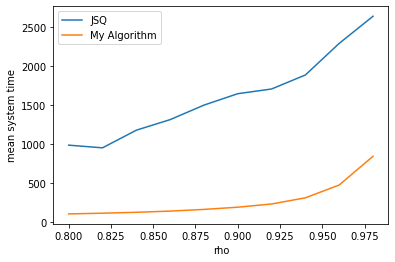

In [8]:
listJSQ = sorted(delayJSQ.items()) # sorted by key, return a list of tuples
xJSQ, yJSQ = zip(*listJSQ) # unpack a list of pairs into two tuples
plt.plot(xJSQ, yJSQ, label = "JSQ")

listMyAlgo = sorted(delayMyAlgo.items()) # sorted by key, return a list of tuples
xMyAlgo, yMyAlgo = zip(*listMyAlgo) # unpack a list of pairs into two tuples
plt.plot(xMyAlgo, yMyAlgo, label = "My Algorithm")
plt.xlabel("rho")
plt.ylabel("mean system time")
plt.legend()
plt.show()